In [1]:
import os
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import numpy as np

from ddpg_inference import Model

In [35]:
root = "/home/eirik/projects/pusher_rl/models/"
modelpath = os.path.join(root, "max_ep_200_40000.pt")

0.57


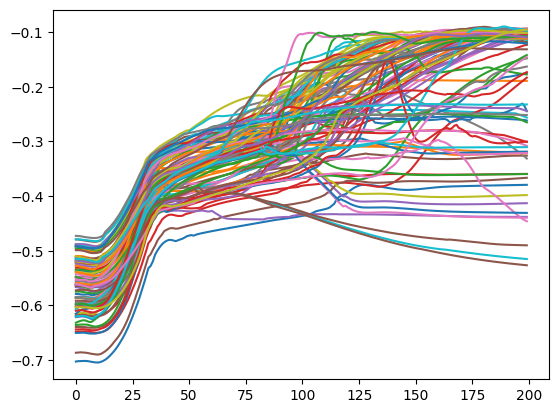

In [37]:
model = Model(path_model=modelpath, render=0, max_steps=200)

N_SEEDS = 100

seeds = [i for i in range(N_SEEDS)]
rewards, success = model.test(seeds, show_progress=False)

for y in rewards:

    x = [i for i in range(len(y))]
    plt.plot(x,y)

print(success)

In [ ]:
def moving_average(a, n=3):
    ret = np.cumsum(a, dtype=float)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n - 1:] / n

def generate_latex_color(name):
    r = np.random.randint(0, 255)
    g = np.random.randint(0, 255)
    b = np.random.randint(0, 255)
    
    inp = [name, "RGB"]

    l = "\\definecolor{"
    l += f"{inp[0]}"
    l += "}{"
    l += f"{inp[1]}"
    l += "}{"
    l += f"{r}, {g}, {b}"
    l += "}"

    # print(l)
    
    return l


# for i in range(100):

#     generate_latex_color(f"color{i}")

In [7]:
r_t = []
latex_full = """"""
style = "thick"
coloridx = np.random.choice(range(1000), N_SEEDS, replace=False)
for (y,s, cid) in zip(rewards, seeds, coloridx):

    cid = int(cid)
    # y = moving_average(y, n=20)
    x = [i for i in range(len(y))]
    r_t.append(y[-1])
    plt.plot(x,y)

    latex = ""

    for x_i, y_i in zip(x, y):
        latex += f"({x_i}, {y_i})"

    color = f"color{cid}"
    latex_full += f"""\\addplot[
                    color={color},
                    style={style}
                    ]
                    coordinates
                """

    latex_full += " "
    latex_full += "{"
    latex_full += latex
    latex_full += "};"
    latex_full += "\n"
    
print(f"eval score : {np.mean(r_t)}")
print(f"success rate : {success}")

print(latex_full)

\addplot[
                    color=color97,
                    style=thick
                    ]
                    coordinates
                 {(0, -0.7005880004654437)(1, -0.7016439978285627)(2, -0.7012132174080887)(3, -0.7011920489911723)(4, -0.7006898729497787)(5, -0.7002056253037805)(6, -0.6995436424701341)(7, -0.698499210652473)(8, -0.6973061749618322)(9, -0.6958575766837329)(10, -0.6941816130319446)(11, -0.6924912006622227)(12, -0.6906955398185439)(13, -0.688441589142974)(14, -0.6856634905975983)(15, -0.6826462488980685)(16, -0.6792487038170933)(17, -0.6755419198877821)(18, -0.6717997464000937)(19, -0.6680702594054333)(20, -0.6644315892210075)(21, -0.6609638057399736)(22, -0.6577400294473339)(23, -0.657896980300385)(24, -0.6563094538188148)(25, -0.6549757559053724)(26, -0.6536039557856319)(27, -0.6519131722989857)(28, -0.6510046187019662)(29, -0.6505152112370121)(30, -0.649887710815394)(31, -0.6495643069913732)(32, -0.6503250625096347)(33, -0.6523267742770269)(34, -0.6551869

In [40]:
T

NameError: name 'T' is not defined

In [12]:
def test():

    return ["hello", "man"], 1234


[a, b(), c = test()

print(a,b,c)

hello man 1234
